In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [6]:
data = pd.read_csv('C:/Users/Temp/Desktop/KAI-Projects/Stock-market-forecasting/data/raw_analyst_ratings.csv')
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [ ]:
data['headline_length'] = data['headline'].apply(len)

# Calculate basic statistics for headline lengths
length_stats = data['headline_length'].describe()

print(length_stats)


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


        Avtive publisher
        

In [20]:
data[['publisher']].value_counts().head(1)

publisher    
Paul Quintaro    228373
Name: count, dtype: int64

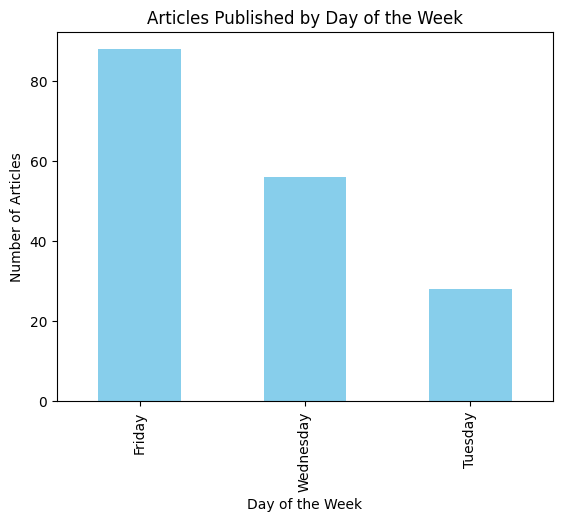

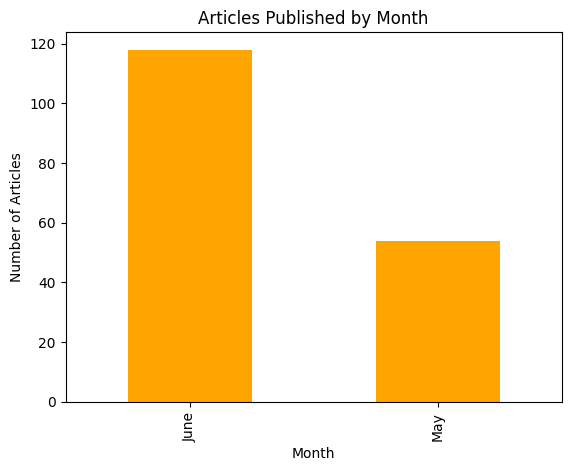

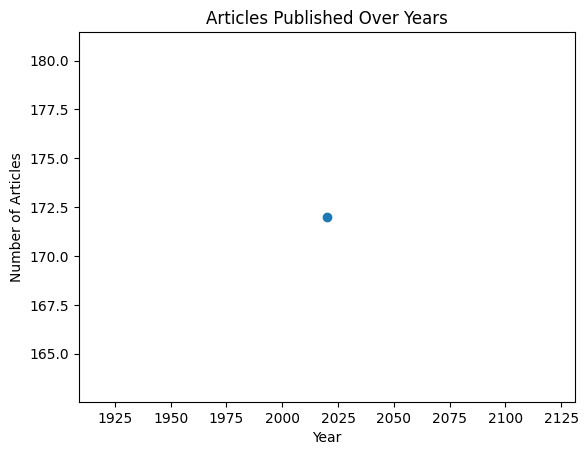

In [29]:
data['date'] = pd.to_datetime(data['date'], format='mixed', errors='coerce')
# Extract components from the date
data['day_of_week'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month_name()
data['year'] = data['date'].dt.year
data['hour'] = data['date'].dt.hour

# Analyze publication frequency by day of the week
day_of_week_counts = data['day_of_week'].value_counts()

# Analyze publication frequency by month
month_counts = data['month'].value_counts()

# Analyze publication frequency over years
yearly_counts = data['year'].value_counts()

# Plot day of the week frequency
day_of_week_counts.plot(kind='bar', title='Articles Published by Day of the Week', color='skyblue')
plt.ylabel('Number of Articles')
plt.xlabel('Day of the Week')
plt.show()

# Plot monthly frequency
month_counts.plot(kind='bar', title='Articles Published by Month', color='orange')
plt.ylabel('Number of Articles')
plt.xlabel('Month')
plt.show()

# Plot yearly trends
yearly_counts.sort_index().plot(kind='line', marker='o', title='Articles Published Over Years')
plt.ylabel('Number of Articles')
plt.xlabel('Year')
plt.show()

In [30]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,month,year,hour
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday,June,2020.0,10.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday,June,2020.0,10.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday,May,2020.0,4.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday,May,2020.0,12.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday,May,2020.0,11.0
